# Support Vector Machines (SVM)

SVM works by finding a hyperplane in an N-dimensional space (N number of features) which fits to the multidimensional data while considering a margin.

There can be many possible hyperplanes that could be selected. However, the objective is to find the hyperplane with the maximum margin, meaning maximum distance between the target classes.

<p align="center">
<img src="1_VfeRR-t9NJlqpJTVLi2dWQ.webp">
</p>

<p align="center">
<img src="1_DxR4KoBF0vvRY2jJPHl_rQ.webp">
</p>


SVM can be used both for regression and classification problems but it is widely used for classification.

<p align="center">
<img src="./0_LynQOZQToe757Z86.webp">
</p>

- Kernel is the function used to convert data into higher dimension.

- Hyperplane is the line separating the classes (for classification problems). For regression, it is the line that we fit to our data to predict continue outcome values.

- Boundary lines are the lines that form the area with the error. They are the two line around hyper plane which represent the margin.

- Support vectors are the data points closest to these boundary lines.

## Kernel

Sometimes data is distributed in a way that it is impossible to get an accurate fit by using a linear line(seperator). SVR can handle highly non-linear data using the kernel function. The function implicitly maps the features to higher dimensions meaning higher feature space. This allows us to describe it also using a linear hyperplane.

<p align="center">
<img src="0_EDSBWdNoGBLZtBCw.webp">
</p>

The most used three kernels are:

- Linear kernel

- Polynomial kernel:

- Radial Basis Function (RBF) — Good for dealing with overlapping data

## Support Vector Regression (SVR)

Similar to linear regression models, SVR also tries to find a curve that best fits the dataset. Remembering our equation for dataset with one feature from linear regression:

$$y = w_1*x_1+c$$

Considering the SVR for a dataset also with one feature, the equation looks similar but with consideration of an error.

$$−e ≤ y−(w_1*x_1+c) ≤e $$

Looking at the equation, it is clear to see that only the points outside the e error area will be considered in the cost calculation. SVR can of course also be used for complicated datasets with more features by using higher dimensional feature terms similar to that in polynomial regression.

Hyperplane is the best fit to the data when it coincides with maximum number of point possible. We determine the boundary lines (the value of e which is the distance from hyperplane) so that the points that are closest to the hyperplane are within the boundary lines.

Keep in mind because the margin (between the boundary lines) will be tolerated, it will not be calculated as error. I guess you can already imagine how this term will allow us to tune the complexity of our model (underfitting/overfitting).

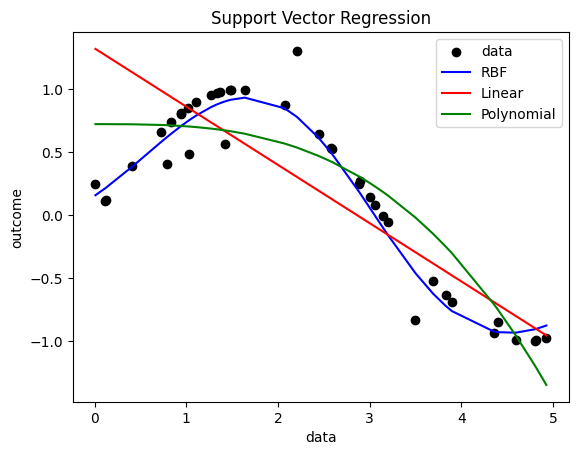

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

np.random.seed(5)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 5)[:, np.newaxis]
y = np.sin(X).ravel()
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))
# Fit regression model
SVR_rbf = SVR(kernel='rbf' )
SVR_lin = SVR(kernel='linear')
SVR_poly = SVR(kernel='poly')
y_rbf = SVR_rbf.fit(X, y).predict(X)
y_lin = SVR_lin.fit(X, y).predict(X)
y_poly = SVR_poly.fit(X, y).predict(X)
# look at the results
plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_rbf, c='b', label='RBF')
plt.plot(X, y_lin, c='r',label='Linear')
plt.plot(X, y_poly, c='g',label='Polynomial')
plt.xlabel('data')
plt.ylabel('outcome')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## Support Vector Machines for Classification

We already saw how the “Support Vector Machines (SVM)” algorithm works for regression. For classification the idea is actually almost the same. In fact SVM is mostly used for classification problems. 

For regression, we mentioned that SVM tries to find a curve that best fits the dataset, and then make a prediction for a new point using that curve. Well, the same curve can easily be used to classify the data to two different classes. For multidimensional space with n dimensions (meaning data with n number of features), the model fits a hyper-plane (also called the decision boundary) that best differentiates the two classes. Remembering the image from the regression section where we explained the kernel…

<p align="center">
<img src="0_EDSBWdNoGBLZtBCw.webp">
</p>

The margin is the gap between the two closest points from each class which is the distance from the hyperplane to the closest points (support vectors). The hyperplane which fits best to the data, meaning which seperates the two classes the best, is the hyperplane with the maximum possible margin. Therefore, the SVM algorithm searches for the hyperplane with the maximum margin (distance to the closest points).

Like we mentioned already in the regression section, some dataset is just not suitable to be classified by a linear hyperplane… In this case, again the “Kernel trick” comes to our rescue implicitly mapping the data to higher dimensions, therefore making it possible for the data to be classified by a linear hyperplane. 

/var/folders/kj/dxrbk0cd2sx4txpt3sm2vrlc0000gn/T/ipykernel_23651/2569069222.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sub[svc.support_, 0], X_sub[svc.support_, 1],c='k', cmap=plt.cm.Paired)


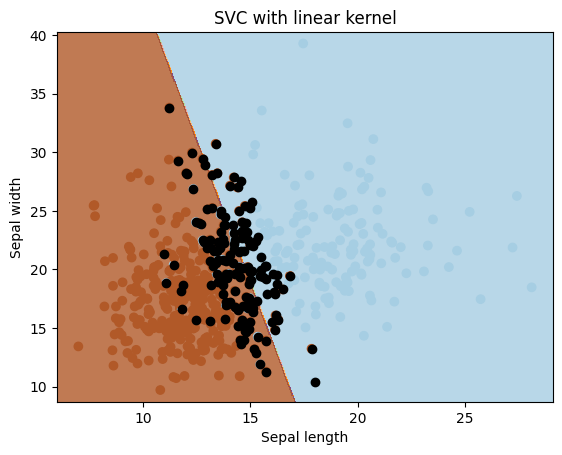

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_sub = X[:, 0:2]
# create a mesh to plot in
x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
#import the SVM model
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear').fit(X_sub, y) #play with this, change kernel to rbf
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(X_sub[svc.support_, 0], X_sub[svc.support_, 1],c='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [3]:
#Create and instance of the classifier model with a linear kernel
lsvm = svm.SVC(kernel="linear")
#fit the model to our train split from previous example
lsvm.fit(X_train,y_train)
#Make predictions using the test split so we can evaluate its performance
y_pred = lsvm.predict(X_test)

Let’s compare the performance of the model by comparing the predictions to the real values from the test set…

In [4]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
